In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')  
import pandas as pd
from variability.lightcurve import LightCurve, FoldedLightCurve, SyntheticLightCurve, ObservationalWindow
from variability.indexes import VariabilityIndex, gaia_AG_proxy
from variability.timescales import TimeScale
from variability.filtering import Filtering
from tqdm import tqdm
from gaia.read_gaiaDR3_lightcurves import gaiadr3_lightcurves

/Users/juliaroquette/anaconda3/envs/NEMESIS/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:241: UserWarning: Automatic timescale estimated from LSP - FAP: 75.41265635204903
  warnings.warn("Automatic timescale estimated from LSP - FAP: {0}".format(self.timescale_FAP))
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:241: UserWarning: Automatic timescale estimated from LSP - FAP: 84.58503831869085
  warnings.warn("Automatic timescale estimated from LSP - FAP: {0}".format(self.timescale_FAP))
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:241: UserWarning: Automatic timescale estimated from LSP - FAP: 64.66730610185189
  warnings.warn("Automatic timescale estimated from LSP - FAP: {0}".format(self.timescale_FAP))
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:241: UserWarning: Automatic timescale estimated from LSP - FAP: 78.70202820814224
  warnings.warn(

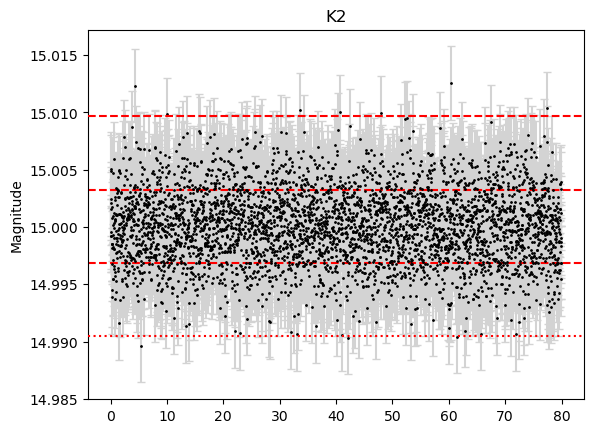

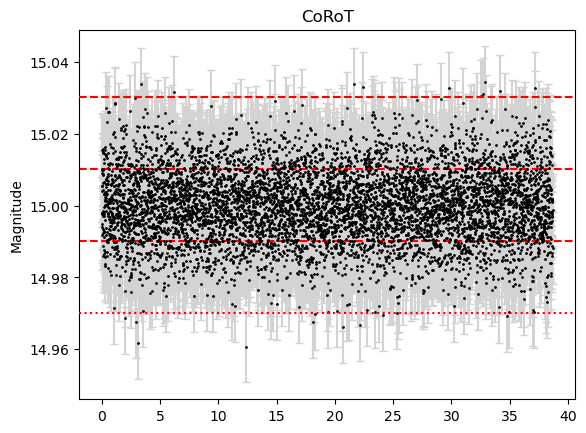

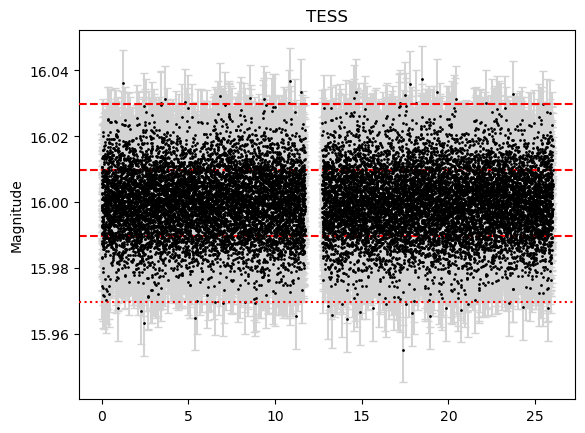

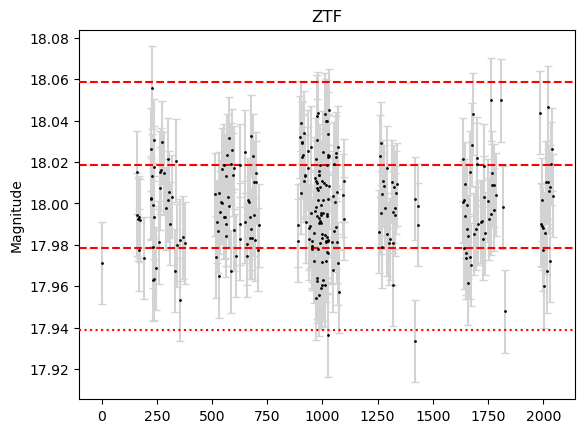

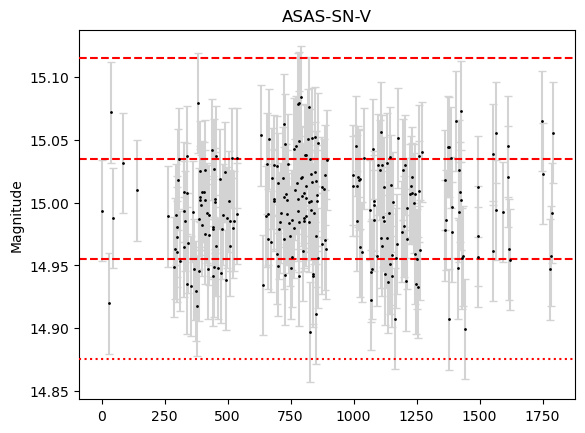

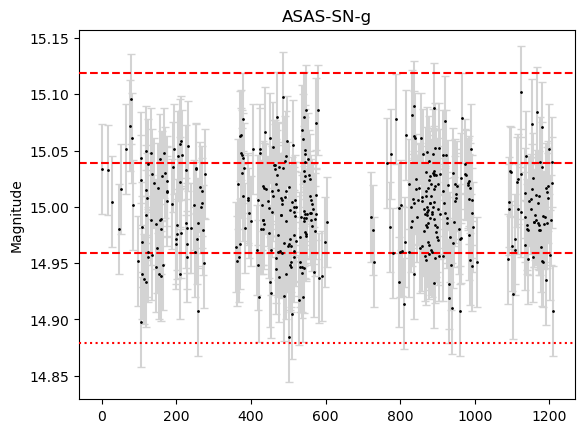

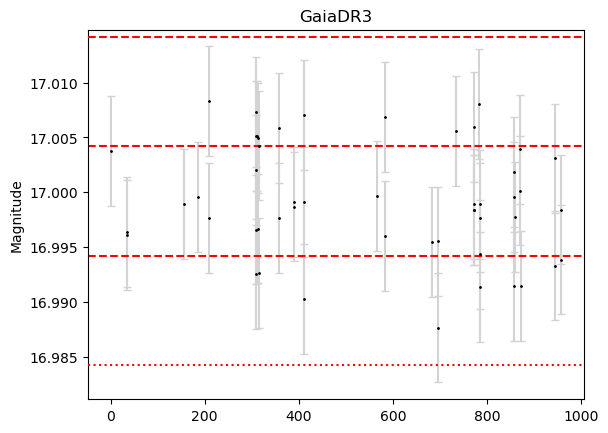

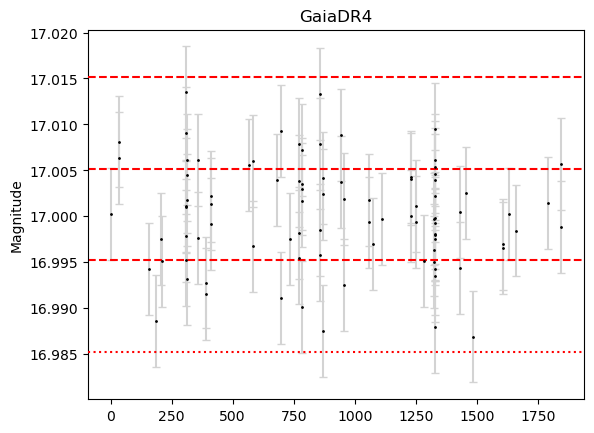

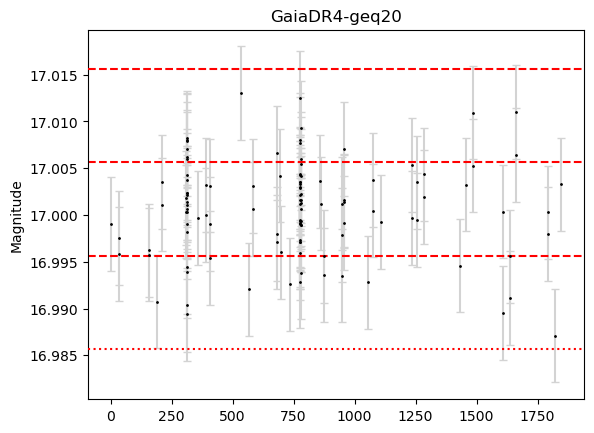

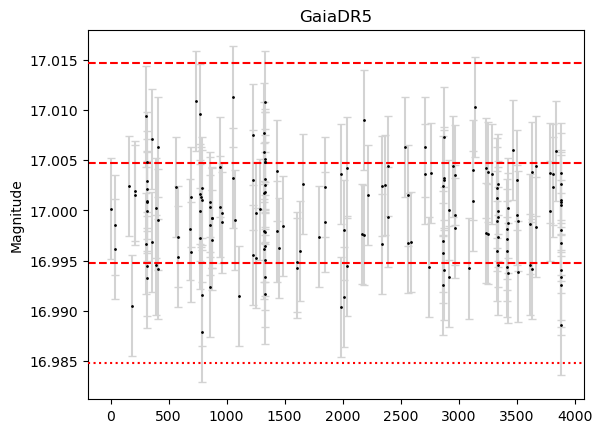

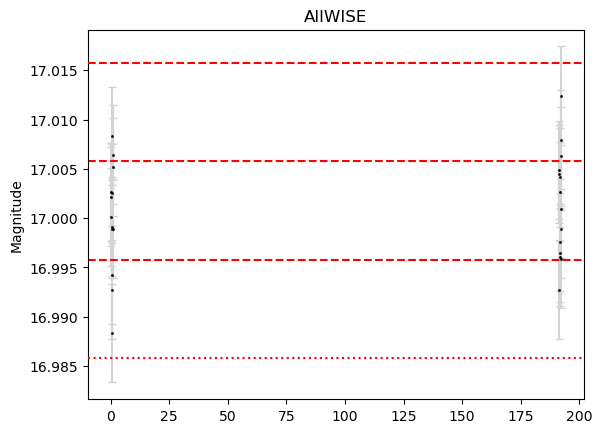

In [2]:
for survey in ['K2', 'CoRoT', 'TESS', 'ZTF', 'ASAS-SN-V', 'ASAS-SN-g',
               'GaiaDR3', 'GaiaDR4', 'GaiaDR4-geq20', 'GaiaDR5', 'AllWISE']:
    fig, ax = plt.subplots()
    test = ObservationalWindow(survey)
    ax.errorbar(test.faint.time, test.faint.mag, abs(test.faint.err), 
                   fmt='.', color='black', ecolor='lightgray', capsize=3, ms=2)
    ax.axhline(np.mean(test.faint.mag) + test.faint.err[0], color='red', linestyle='--')
    ax.axhline(np.mean(test.faint.mag) - test.faint.err[0], color='red', linestyle='--')
    ax.axhline(np.mean(test.faint.mag) + 3*test.faint.err[0], color='red', linestyle='--', zorder=10)
    ax.axhline(np.mean(test.faint.mag) - 3*test.faint.err[0], color='red', linestyle=':', zorder=10)    
    ax.set_ylabel('Magnitude')
    ax.set_title(survey)

/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:313: UserWarning: Peak-to-peak amplitude not provided, using default value of 0.1
  warnings.warn(f'Peak-to-peak amplitude not provided, using default value of {self._PTP_AMP}')
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:318: UserWarning: Timescale not provided, using default value of 8.0
  warnings.warn(f'Timescale not provided, using default value of {self._TIMESCALE}')
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:313: UserWarning: Peak-to-peak amplitude not provided, using default value of 0.1
  warnings.warn(f'Peak-to-peak amplitude not provided, using default value of {self._PTP_AMP}')
/Users/juliaroquette/Work/Prog/Jupyter/NEMESIS/QMindex/jupyter/../variability/lightcurve.py:318: UserWarning: Timescale not provided, using default value of 8.0
  warnings.warn(f'Timescale not provided, using defau

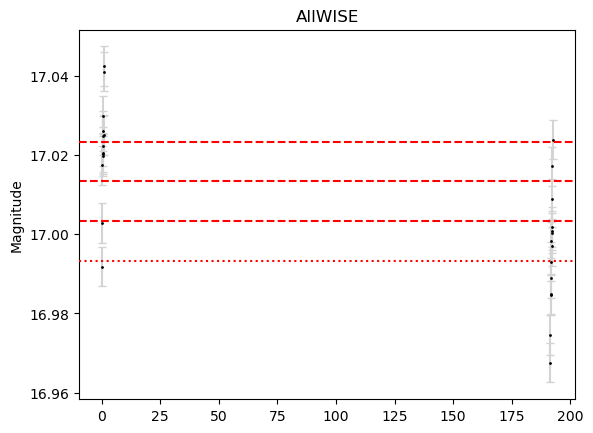

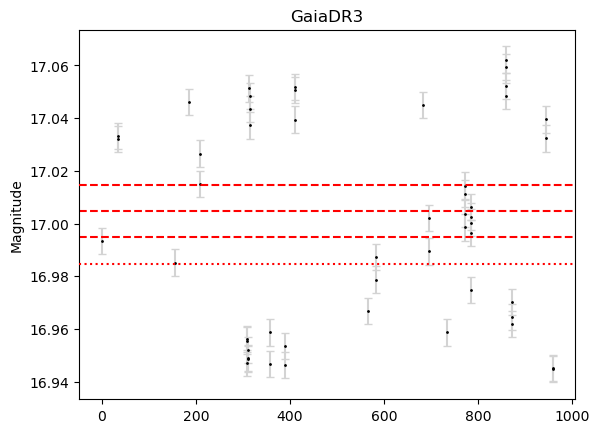

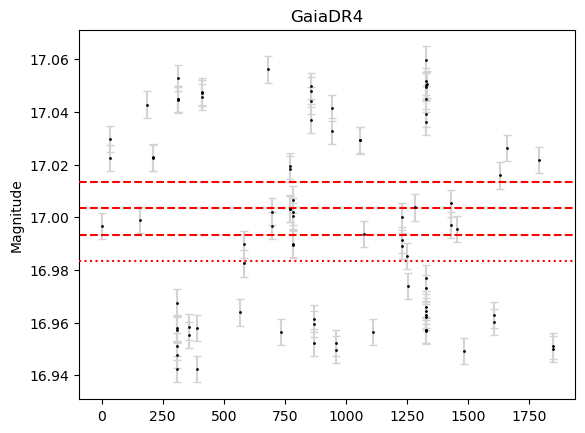

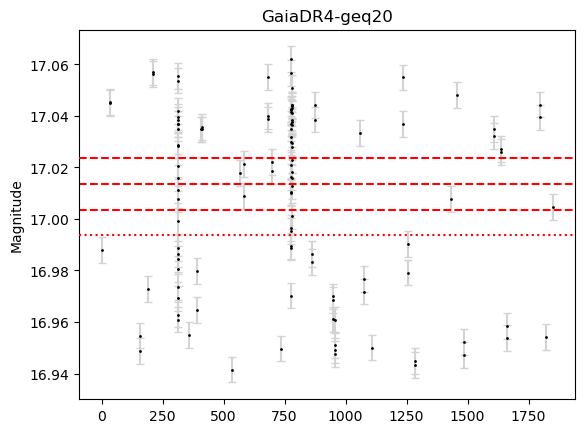

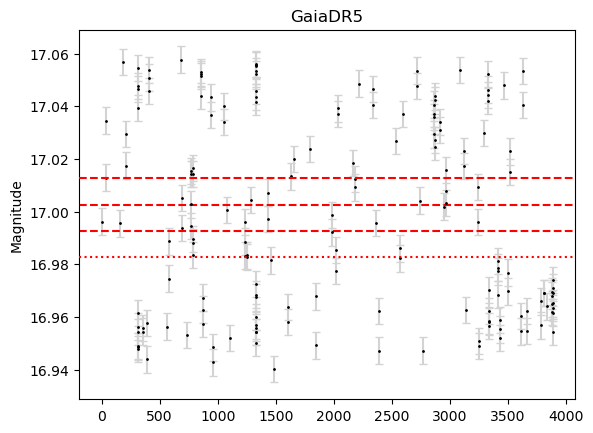

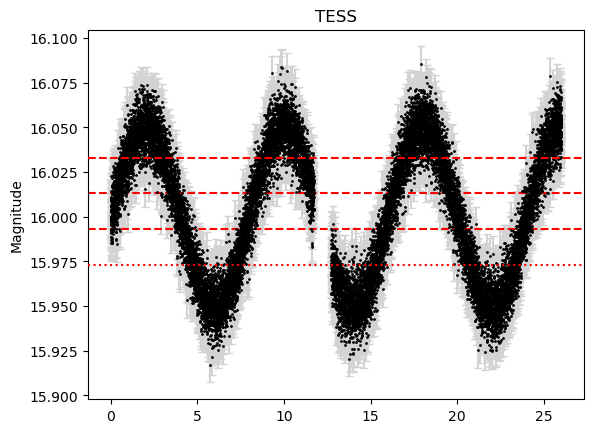

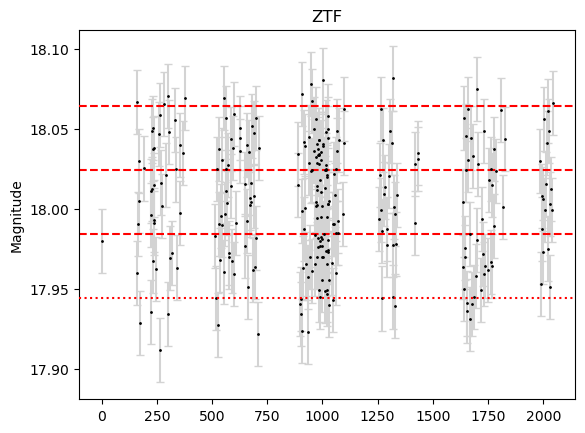

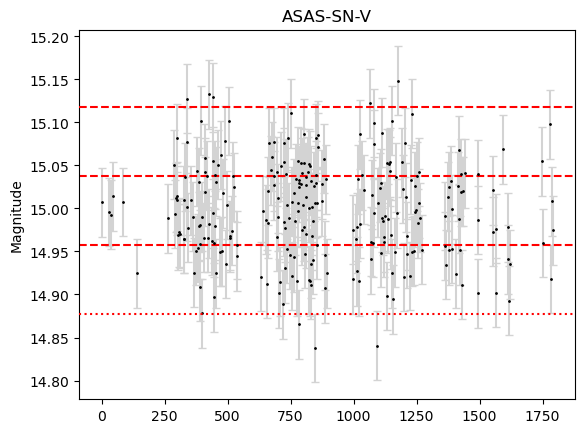

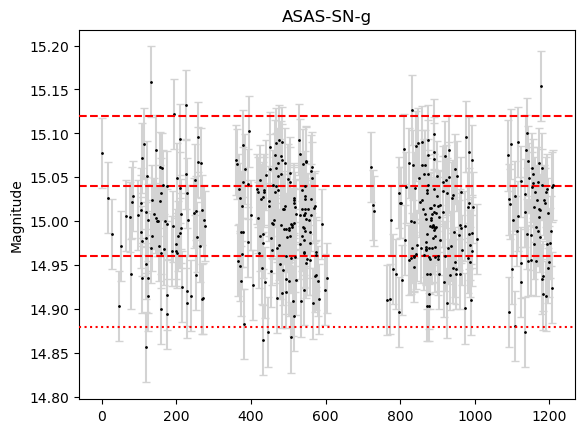

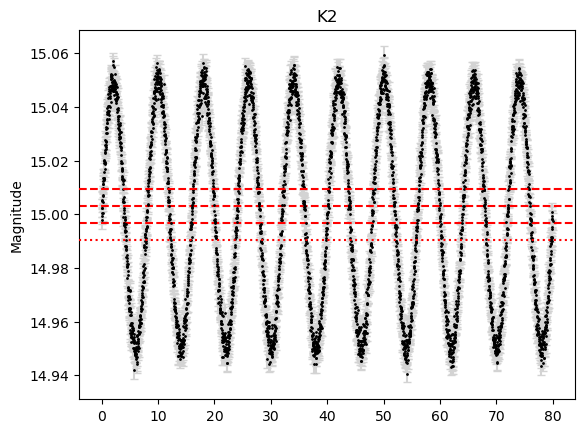

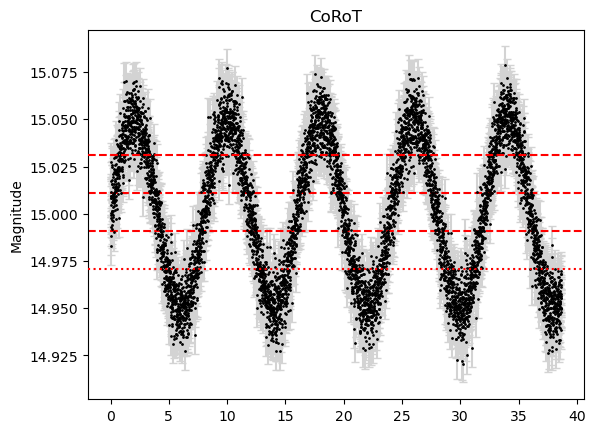

In [3]:
for survey in ObservationalWindow.surveys_object_names.keys():
    fig, ax = plt.subplots()
    # test = ObservationalWindow(survey)
    lc = SyntheticLightCurve(model="eclipsing_binary")
    test = vars(lc)[survey]
    ax.errorbar(test.faint.time, test.faint.mag, abs(test.faint.err), 
                   fmt='.', color='black', ecolor='lightgray', capsize=3, ms=2)
    ax.axhline(np.mean(test.faint.mag) + test.faint.err[0], color='red', linestyle='--')
    ax.axhline(np.mean(test.faint.mag) - test.faint.err[0], color='red', linestyle='--')
    ax.axhline(np.mean(test.faint.mag) + 3*test.faint.err[0], color='red', linestyle='--', zorder=10)
    ax.axhline(np.mean(test.faint.mag) - 3*test.faint.err[0], color='red', linestyle=':', zorder=10)    
    ax.set_ylabel('Magnitude')
    ax.set_title(survey)